# Graphing Data with histogram and kernal density estimate

In [749]:
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.mlab import GaussianKDE
from matplotlib.ticker import FormatStrFormatter

In [750]:
col = 'Returns' # column being graphed
file_name = 'long biased monthly net returns.csv' # name of the csv file
show_density = True # y axis: true = density, false = frequency
title = 'XYZ COMPANY Long Biased Monthly Net Returns' # graph title
x_axis_label = 'Returns (%)' # x axis title
quality = 1.5 # output image quality, default: 1.5
bin_size = 2 # size of bins on graph, default: 2
bin_label_freq = 2 # frequency of bin labels, default: 2
x_axis_font_size = 9 # font size for the x axis, default: 9

In [751]:
df = pd.read_csv(file_name)[col]

In [752]:
# get data statistics
r_mean = df.mean()
r_median = df.median()
r_range = (df.min(), df.max())
r_std = df.std()
r_skew = df.skew()
r_kurt = df.kurtosis()

In [753]:
# print statistics of data
print(f'Mean: {round(r_mean, 4)}%')
print(f'Median: {round(r_median, 4)}%')
print(f'Range: {r_range[0]}%, {r_range[1]}%')
print(f'Standard deviation: {round(r_std, 4)}%')
print(f'Skew: {round(r_skew, 4)}%')
print(f'Kurtosis: {round(r_kurt, 4)}%')

Mean: 1.4598%
Median: 1.42%
Range: -25.16%, 25.81%
Standard deviation: 7.1894%
Skew: -0.1915%
Kurtosis: 2.103%


In [754]:
# get kernel density estimate (KDE)
kde = GaussianKDE(df)

In [755]:
# setting bins and the labels
bins = list(range(round(r_range[0])-1, round(r_range[1])+1, 2))
bin_labels = list(range(round(r_range[0])+1, round(r_range[1])+1, 4))

C:\Users\oliver\AppData\Local\Temp\ipykernel_13584\211412518.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


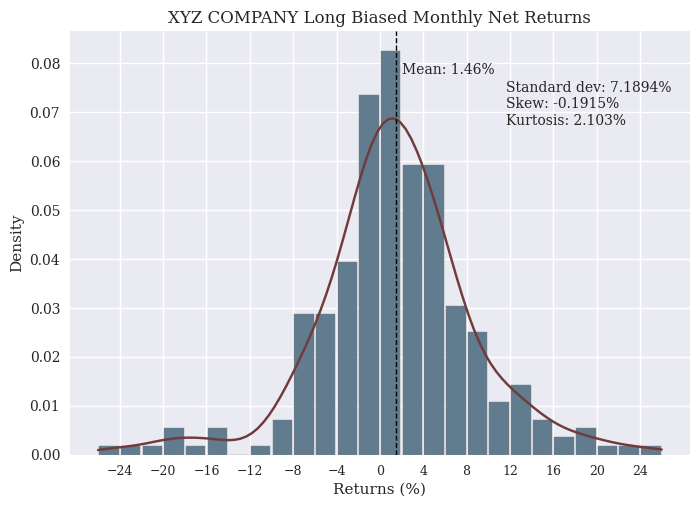

In [756]:
# style like seaborn
plt.style.use('seaborn')

# change font
plt.rcParams["font.family"] = "serif"

# create histogram plot
fig, ax = plt.subplots()
ax.hist(x=df, bins=bins, rwidth=0.9, density=show_density, color='#607c8e', edgecolor='gray')

# create kernel density estimate (KDE) plot
xx = np.linspace(round(r_range[0])-1, round(r_range[1]), 100)
if show_density:
    ax.plot(xx, kde(xx), color='#713B3B')
    plt.ylabel('Density')
else:
    ax.plot(xx, kde(xx)*len(df)*2, color='#713B3B')
    plt.ylabel('Frequency')

# add extra info about data
plt.figtext(.67, .77, f'Standard dev: {round(r_std, 4)}%')
plt.figtext(.67, .74, f'Skew: {round(r_skew, 4)}%')
plt.figtext(.67, .71, f'Kurtosis: {round(r_kurt, 4)}%')

# line for mean
plt.axvline(r_mean, color='k', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(r_mean*1.4, max_ylim*0.9, f'Mean: {round(r_mean, 2)}%')

# add labels
plt.title(title)
plt.xlabel(x_axis_label)

# reformat x axis
ax.set_xticks(bin_labels)
plt.xticks(fontsize=x_axis_font_size)

# save as png
plt.savefig('graph.png', dpi=int(100*quality))